In [ ]:
import multi_experiment
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.io as scipyio
import numpy as np

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

0/5 Experiment with 0/4 Goals, Start
[1000/3000] Avg Total Reward 158.078007292, DQN Loss 27.1398015022, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 992.526882511, DQN Loss 26.7842282057, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1531.51706599, DQN Loss 6.73767997324, Epsilon 0.0497833343533
Evaluation Result: 1767.6092729


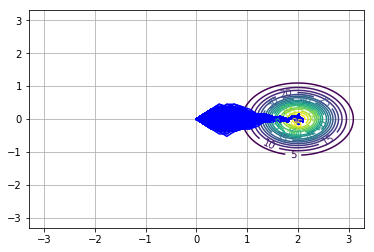

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f08d3d4ff90>> ignored


0/5 Experiment with 1/4 Goals, Start
[1000/3000] Avg Total Reward 162.017140875, DQN Loss 64.0065597296, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 921.868701056, DQN Loss 50.4862820506, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1524.74968117, DQN Loss 9.44796265662, Epsilon 0.0497833343533
Evaluation Result: 1772.4986463


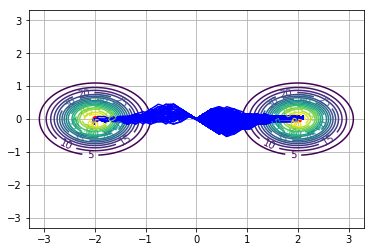

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f0861fa3f90>> ignored


0/5 Experiment with 2/4 Goals, Start
[1000/3000] Avg Total Reward 172.58319982, DQN Loss 49.4609472156, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 1017.70074304, DQN Loss 18.2090036124, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1533.63671569, DQN Loss 6.64013402164, Epsilon 0.0497833343533
Evaluation Result: 1770.06076616


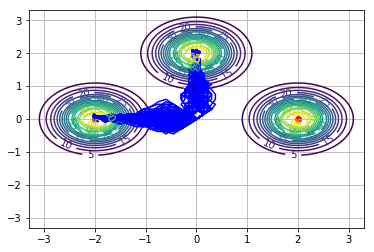

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f08605a95d0>> ignored


0/5 Experiment with 3/4 Goals, Start
[1000/3000] Avg Total Reward 182.081148987, DQN Loss 53.8582782745, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 967.263554098, DQN Loss 38.4446294904, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1526.3295573, DQN Loss 11.6604182124, Epsilon 0.0497833343533
Evaluation Result: 1766.40384203


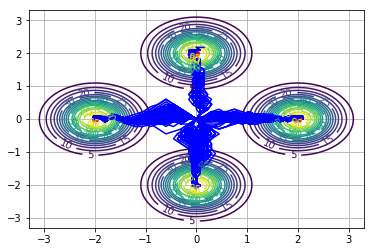

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f0860102890>> ignored


1/5 Experiment with 0/4 Goals, Start
[1000/3000] Avg Total Reward 139.127372793, DQN Loss 18.3162357211, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 965.610378424, DQN Loss 22.9058791697, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1517.45278283, DQN Loss 8.51663587987, Epsilon 0.0497833343533
Evaluation Result: 1765.05626449


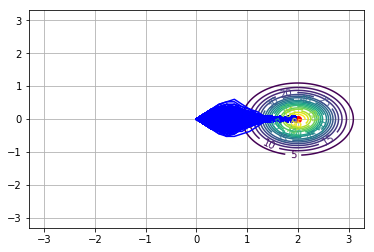

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f08906a6a50>> ignored


1/5 Experiment with 1/4 Goals, Start
[1000/3000] Avg Total Reward 155.739450409, DQN Loss 36.9225472808, Epsilon 0.367870243994
[2000/3000] Avg Total Reward 987.330044463, DQN Loss 26.2258229852, Epsilon 0.135328516416
[3000/3000] Avg Total Reward 1515.35307636, DQN Loss 6.26861268282, Epsilon 0.0497833343533
Evaluation Result: 1769.39373629


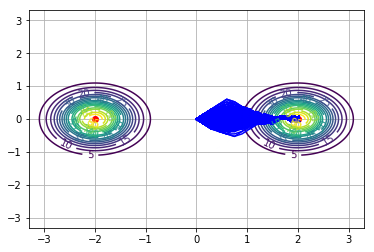

Exception TypeError: "render() got an unexpected keyword argument 'close'" in <bound method MultiGoalEnv.__del__ of <multigoal.MultiGoalEnv object at 0x7f0862005d10>> ignored


1/5 Experiment with 2/4 Goals, Start


In [ ]:
dqn_hidden_spec = [
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh},
                {'dim': 256,'activation': tf.nn.tanh}
            ]

n_exp = 5
n_goal = 4
n_eval = 500
for i_exp in range(n_exp):
    for i_goal in range(n_goal):
        exp = multi_experiment.Experiments(seed=i_exp,action_res=[5,5],nr_goal=i_goal+1,discount=0.7,dqn_hidden_spec=dqn_hidden_spec,
                             max_epi=3000,max_step=20,
                             batch_size=2000,learning_rate=1e-4,target_update_period=25,
                             replay_memory_size=50000,eps_decay_rate=0.99995, strategy="Sparsemax",scale=3.)
        print("{}/{} Experiment with {}/{} Goals, Start".format(i_exp,n_exp,i_goal,n_goal))
        
        return_list = exp.run(display_period=1000)
        eval_list, info_list = exp.evaluation(max_eval_epi=n_eval)
        exp.env.plot_paths(info_list)
        plt.draw()
        plt.pause(0.005)
        
        data = {"return_list":return_list,"eval_list":eval_list, "info_list":info_list}        
        data_file_name = "MultiGoal_Sparsemax_Goal"+str(i_goal+1)+"Trial"+str(i_exp)+".mat"
        scipyio.savemat(data_file_name, data)
        
print("{} is finished and is saved".format(data_file_name))